In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('haberman.data')

In [3]:
data

A   B  C  D
0    30  64  1  1
1    30  62  3  1
2    30  65  0  1
3    31  59  2  1
4    31  65  4  1
..   ..  .. .. ..
301  75  62  1  1
302  76  67  0  1
303  77  65  3  1
304  78  65  1  2
305  83  58  2  2

[306 rows x 4 columns]

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Import necessary libraries for k-nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
acc={}
# Define a function to train and test the k-nearest neighbors model for a given k and distance metric
def knn_classifier(k, metric):
    # Create KNeighborsClassifier object with k neighbors and chosen distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    
    # Train the model using the training set
    knn.fit(X_train, y_train)
    
    # Test the model using the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Return the accuracy of the model
    return accuracy

# Test the k-nearest neighbors model for different values of k and distance metric
k_values = range(1, 6)
dist_metrics = ['manhattan', 'euclidean']

for metric in dist_metrics:
    print(f'Distance metric: {metric}')
    acc_l=[]
    for k in k_values:
        accuracy = knn_classifier(k, metric)
        print(f'k = {k}, accuracy = {accuracy}')
        acc_l.append(accuracy)
    acc[metric]  = acc_l  


Distance metric: manhattan
k = 1, accuracy = 0.6774193548387096
k = 2, accuracy = 0.6774193548387096
k = 3, accuracy = 0.6451612903225806
k = 4, accuracy = 0.6774193548387096
k = 5, accuracy = 0.6774193548387096
Distance metric: euclidean
k = 1, accuracy = 0.7096774193548387
k = 2, accuracy = 0.7741935483870968
k = 3, accuracy = 0.6451612903225806
k = 4, accuracy = 0.7096774193548387
k = 5, accuracy = 0.6129032258064516


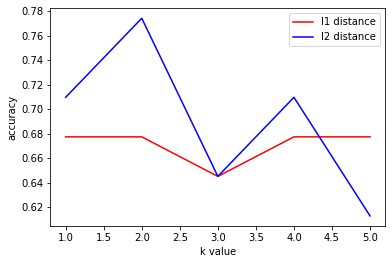

In [15]:
plt.plot([i+1 for i in range(5)],acc['manhattan'],color='r',label='l1 distance')
plt.plot([i+1 for i in range(5)],acc['euclidean'],color='b',label='l2 distance')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Test size: 0.4
Distance metric: manhattan
k = 1, accuracy = 0.6747967479674797
k = 2, accuracy = 0.7479674796747967
k = 3, accuracy = 0.7479674796747967
k = 4, accuracy = 0.7560975609756098
k = 5, accuracy = 0.7642276422764228
Distance metric: euclidean
k = 1, accuracy = 0.7154471544715447
k = 2, accuracy = 0.7804878048780488
k = 3, accuracy = 0.7642276422764228
k = 4, accuracy = 0.7560975609756098
k = 5, accuracy = 0.7723577235772358


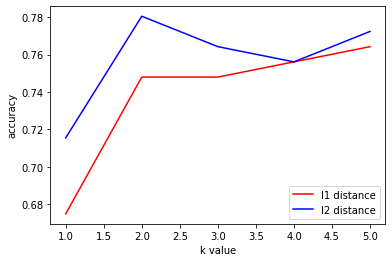

Test size: 0.3
Distance metric: manhattan
k = 1, accuracy = 0.6847826086956522
k = 2, accuracy = 0.717391304347826
k = 3, accuracy = 0.7065217391304348
k = 4, accuracy = 0.7391304347826086
k = 5, accuracy = 0.782608695652174
Distance metric: euclidean
k = 1, accuracy = 0.717391304347826
k = 2, accuracy = 0.75
k = 3, accuracy = 0.7282608695652174
k = 4, accuracy = 0.7391304347826086
k = 5, accuracy = 0.782608695652174


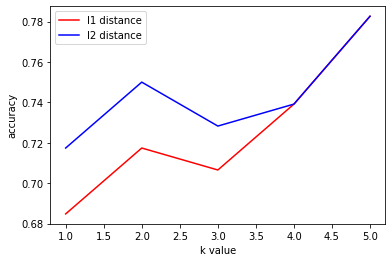

Test size: 0.1
Distance metric: manhattan
k = 1, accuracy = 0.6774193548387096
k = 2, accuracy = 0.6774193548387096
k = 3, accuracy = 0.6451612903225806
k = 4, accuracy = 0.6774193548387096
k = 5, accuracy = 0.6774193548387096
Distance metric: euclidean
k = 1, accuracy = 0.7096774193548387
k = 2, accuracy = 0.7741935483870968
k = 3, accuracy = 0.6451612903225806
k = 4, accuracy = 0.7096774193548387
k = 5, accuracy = 0.6129032258064516


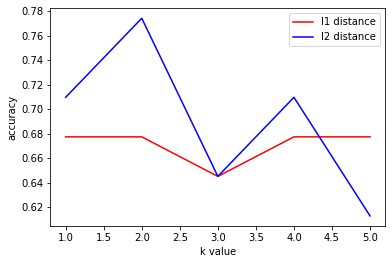

In [16]:
# Test the k-nearest neighbors model for different training and test set splits
split_ratios = [0.4, 0.3, 0.1]
for ratio in split_ratios:
    acc={}
    print(f'Test size: {ratio}')
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    for metric in dist_metrics:
      print(f'Distance metric: {metric}')
      acc_l=[]
      for k in k_values:
          accuracy = knn_classifier(k, metric)
          print(f'k = {k}, accuracy = {accuracy}')
          acc_l.append(accuracy)
      acc[metric]  = acc_l  
    plt.plot([i+1 for i in range(5)],acc['manhattan'],color='r',label='l1 distance')
    plt.plot([i+1 for i in range(5)],acc['euclidean'],color='b',label='l2 distance')
    plt.xlabel('k value')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


            
             
        